# Computer Vision: Fundamentals in Image Processing for Machine Learning Processes

Romen Samuel Wabina | Data Science and Artificial Intelligence | AIT Brain Laboratory | School of Engineering and Technology | Asian Institute of Technology 

Image processing is a method to perform some operations on an image, in order to get an enhanced image or to extract some useful information from it. In this lecture, we will dicuss the fundamental applications of image processing, machine learning, and computer vision. 

## Fundamentals in Image Processing

Image Processing is any form of <i>signal processing</i> for which our input is an image, such as photographs or frames of video and our output can be either an image or a set of characteristics or parameters related to the image. Nowadays, image processing is among rapidly growing technologies. It forms core research area within engineering and computer science disciplines too.

The purpose of image processing are listed below:
- Visualization: Observe the objects that are not visible
- Sharpening and restoration: To create a better image
- Image retrieval: Seek for the image of interesst
- Pattern measurement: Measures various objects in an image
- Image recognition: Distinguish the objects in an image

Import the essential Python libraries vital in image processing.

In [2]:
import numpy as np
import cv2 #pip install opencv-python
import matplotlib.pyplot as plt
import tensorflow as tf #pip install tensorflow 
# import tensorflow_addons as tfa  #pip install tensorflow_addons

#pip install scikit-image
from skimage.color import rgb2lab, lab2rgb
from skimage.util import invert

### How to load an image data?

Python offers several libraries that can load an image data. These libraries include the following scipts.
- <code>from matplotlib.image import imread</code>
- <code>from cv2 import imread</code>
    - <code>pip install opencv-python</code>
- <code>from skimage.io import imread</code>
    - <code>pip install scikit-image</code>

In this tutorial, we will use <code>skimage</code>. We can use <code>plt.imshow</code> to display data as an image, i.e., on a 2D regular data. The input may be either be actual RGB channel, which will be rendered as a pseudocolor image.

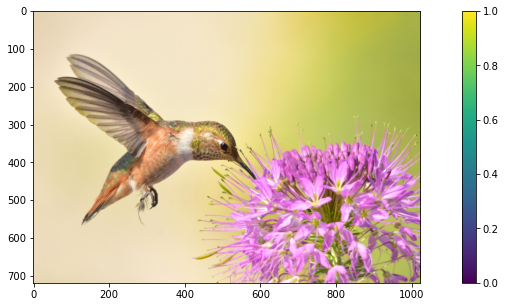

In [3]:
#from skimage.io import imread
from matplotlib.image import imread
image = imread('images/humming.png')
plt.figure(figsize = (15, 5))
plt.imshow(image)
plt.colorbar()

Check the properties of the loaded image.

In [4]:
print('Image shape:')
print(f'Image height:   \t{image.shape[0]}')
print(f'Image width:    \t{image.shape[1]}')
print(f'Image channels: \t{image.shape[2]}')

Image shape:
Image height:   	719
Image width:    	1024
Image channels: 	3


### Practice test: Determine the image dimensions (i.e., height, width, and channels) of the image (filename: 'asconda.png' and 'humming.png')

## Image Augmentations

Data Augmentation is a technique that can be used to artificially expand the size of a training set by creating modified data from the existing one. It is a good practice to use DA if you want to prevent overfitting, or the initial dataset is too small to train on, or even if you want to squeeze better performance from your model. We can apply various changes to the initial data. The most vital techniques are the following:

- Geometric transformations:        Flip, Crop, Rotate images
- Color space transformations:      Change RGB color channels, Color intensification
- Kernel filters:                   Sharpen or Blur Images
- Random Erasing:                   Delete a part of the initial image
- Mixing images:                    Mix images with one another


### 1. Flipping an image
The most useful libraries for <b>data augmentation</b> are TensorFlow or Keras. Let’s take a closer look on the first technique and define a function that will visualize an image and then apply the flip to that image using <code>tf.image</code>. We used <code>tf.image.flip_left_right</code> to flip the image horizontally, while we used <code>tf.image.flip_up_down</code> to flip the image vertically. You may see the code and the result below. 


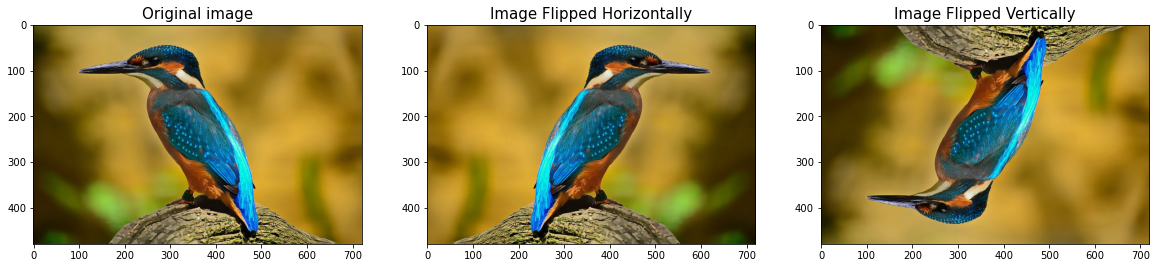

In [5]:
def flip_techniques():
    image = imread('images/bird.png')
    flip_horizontal = tf.image.flip_left_right(image)
    flip_vertically = tf.image.flip_up_down(image)

    fig = plt.figure(figsize = (20, 9))
    plt.subplot(1, 3, 1)
    plt.title('Original image', size = 15)
    plt.imshow(image)

    plt.subplot(1, 3, 2)
    plt.title('Image Flipped Horizontally', size = 15)
    plt.imshow(flip_horizontal)

    plt.subplot(1, 3, 3)
    plt.title('Image Flipped Vertically', size = 15)
    plt.imshow(flip_vertically)

flip_techniques()

### 2. Rotating an image

For rotating an image (or a batch of images) by 90 degrees, you can use <code>tf.image.rot90(image, k = 1, name = None)</code> where <code>k</code> denotes the number of 90 degree rotations you want to make.

Text(0.5, 1.0, 'Rotated 4 times')

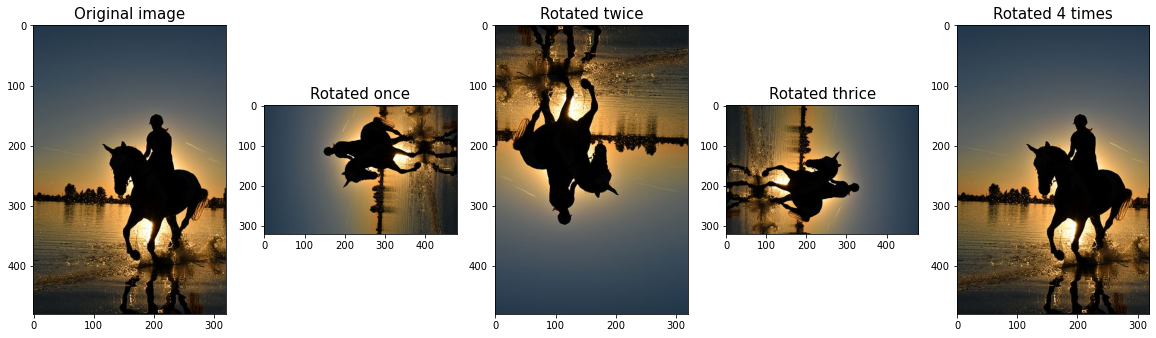

In [6]:
image = imread('images/sea_horse.png')
rotated1 = tf.image.rot90(image, k = 1, name = None)
rotated2 = tf.image.rot90(image, k = 2, name = None)
rotated3 = tf.image.rot90(image, k = 3, name = None)
rotated4 = tf.image.rot90(image, k = 4, name = None)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5, figsize = (20, 9))
ax1.imshow(image)
ax1.set_title('Original image', size = 15)

ax2.imshow(rotated1)
ax2.set_title('Rotated once', size = 15)

ax3.imshow(rotated2)
ax3.set_title('Rotated twice', size = 15)

ax4.imshow(rotated3)
ax4.set_title('Rotated thrice', size = 15)

ax5.imshow(rotated4)
ax5.set_title('Rotated 4 times', size = 15)

### 3. Image Brightness

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


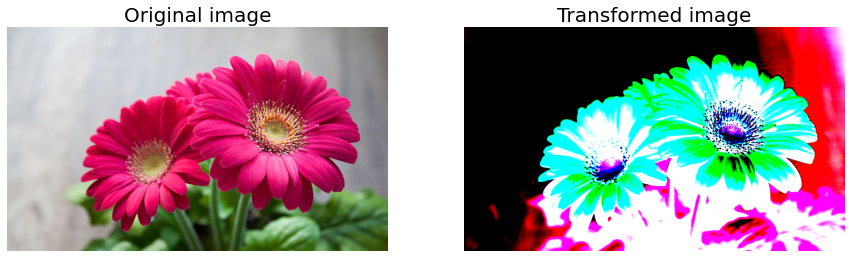

In [56]:
image = imread('images/flowers.png')

def show_result(image, result):
    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(image),    plt.axis('off'), plt.title('Original image',    size=20)
    plt.subplot(122), plt.imshow(result),   plt.axis('off'), plt.title('Transformed image', size=20)
    plt.show()


# Use delta between [-1, 1] for optimal brightness
# tf.image.adjust_brightness normalizes then converts the image numpy array to float
# Then the image(float array) + (or -) delta to increase brightness
# image(float) is converted back to its original data type

# Similar with tf.image.random_brightness(image, max_delta) 
bright = tf.image.adjust_brightness(image, delta = 0.9)


# Contrast is adjusted independently for each channel of each image
# How contrast works: (x - mean) * contrast_factor + mean
# tf.image.adjust_contrast normalizes then converts the image numpy array to float
# contrast_factor = [-inf, inf]

# Try to experiment with tf.image.random_contrast too!
contrast = tf.image.adjust_contrast(image, contrast_factor = -10)

show_result(image, contrast)

You can explore various functions here <link>https://www.tensorflow.org/api_docs/python/tf/image</link>. It contains various functions for image processing basics. 
Other Python libraries can also change the image brightness using <code>skimage.rgb2lab</code>. You can try experimenting on this one.

In [7]:
def grayscale(image):
    transform = rgb2lab(image)
    transform[..., 1] = transform[..., 2] = 0
    transform = lab2rgb(transform)
    return transform

def change_brightness(image, value):
    '''
    value = [-100, 100]
    '''
    transform = rgb2lab(image)
    transform[..., 0] = transform[..., 0] + value
    transform = lab2rgb(transform)
    return transform

def inverted(image):
    transform = rgb2lab(image)
    transform[..., 0] = np.max(transform[..., 0]) - transform[..., 0]
    transform = lab2rgb(transform)
    return transform

### Practice test: Demonstrate the following:
- <code>tf.image.random_brightness</code>
- <code>tf.image.random_contrast</code>
- <code>tf.image.random_hue</code>
- <code>tf.image.random_saturation</code>

### 5. Image Filters
Mean filtering is a filtering technique, which is often used to remove noise from an image or signal. The idea is to run through the image pixel by pixel and replacing it with the average values of neighboring pixels. To do this, we can use 

- <code>tfa.image.mean_filter2d(image, filter_shape: int)</code> (i.e., poor result but faster); or 
- <code>tfa.image.gaussian_filter2d(image, filter_shape: int)</code> (i.e., good result).

What's the difference?

Text(0.5, 1.0, 'Gaussian Blur')

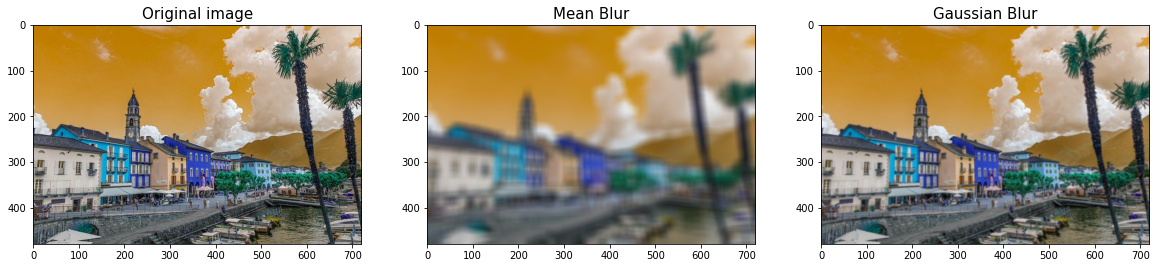

In [8]:
import warnings
warnings.filterwarnings('ignore')

image = cv2.imread('images/ascona.png')

meanblur     = tfa.image.mean_filter2d(image, filter_shape = [20, 20])
gaussianblur = tfa.image.gaussian_filter2d(image, filter_shape = [20, 20])

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (20, 9))
ax1.imshow(image)
ax1.set_title('Original image', size = 15)

ax2.imshow(meanblur)
ax2.set_title('Mean Blur', size = 15)

ax3.imshow(gaussianblur)
ax3.set_title('Gaussian Blur', size = 15)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Increased Sharpness of 50')

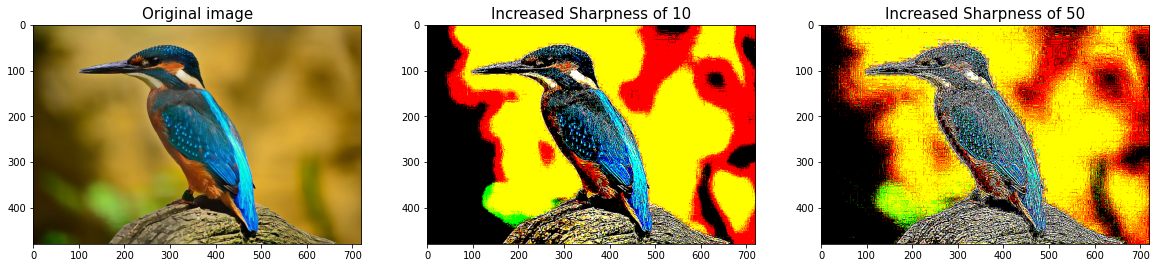

In [64]:
image = imread('images/bird.png')

#import tensorflow.add_ons as tfa
# tfa.image.sharpness
sharpby10 = tfa.image.sharpness(image, factor = 10)
sharpby50 = tfa.image.sharpness(image, factor = 50)

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (20, 9))

ax1.imshow(image)
ax1.set_title('Original image', size = 15)

ax2.imshow(sharpby10)
ax2.set_title('Increased Sharpness of 10', size = 15)

ax3.imshow(sharpby50)
ax3.set_title('Increased Sharpness of 50', size = 15)

Another way of enhancing the features of the image is using histogram equalization. Histogram equalization improves contrast of the image. The aim of histogram equalization is that the most frequent pixel values be evenly spread out and distributed.


As it can be seen in the figure below, the image above has very low contrast. In cases such as this, it is important that the contrast be improved such that the features of the image are more clearly visible. <b>How can we objectively determine an image has low contrast?</b> 


Use histogram plots.

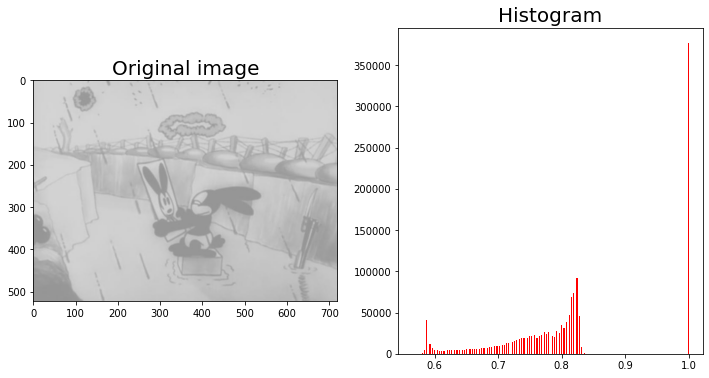

In [66]:
image = imread('images/contrastexample.png')

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 6))
ax1.imshow(image)
ax1.set_title('Original image',    size = 20)

ax2.hist(image.flatten(), 256, color = 'r')
ax2.set_title('Histogram', size = 20)
plt.show()

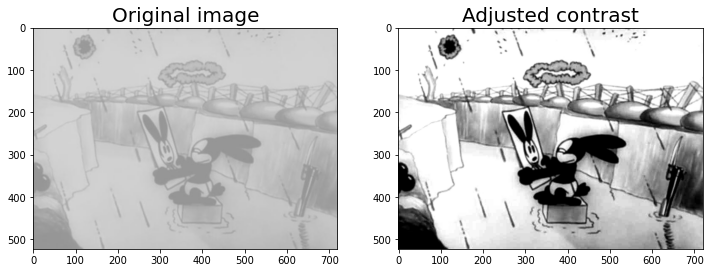

In [11]:
contrast = tf.image.adjust_contrast(image, contrast_factor = 5)

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 6))
ax1.imshow(image)
ax1.set_title('Original image',    size = 20)

ax2.imshow(contrast)
ax2.set_title('Adjusted contrast', size = 20)
plt.show()

### 5. Converting the image to a different color space

Converting the image to HSV (Hue, Saturation, and Value channels) color space and then splitting the channels makes it easier to segment the object (i.e., flowers) and the shadows. This can be useful for applications such as object tracking, and removing unwanted noise on the image such as the shadow. The RGB color space isn’t robust to shadows, slight changes in lighting (which influences the color of the object). 

For tasks such as object tracking using classical computer vision, oftentimes a finely tuned mask in the RGB space will fail later on when being used in a slightly different environment, because of the reasons listed above. Also, once the image is converted to a different space such as HSV, separating the channels often helps in segmenting the area of interest and removing noise. As it can be seen below, the shadow can be removed much easier and the tennis ball segmented once the image has been converted to HSV space and the channels split.

Text(0.5, 1.0, 'Value channel')

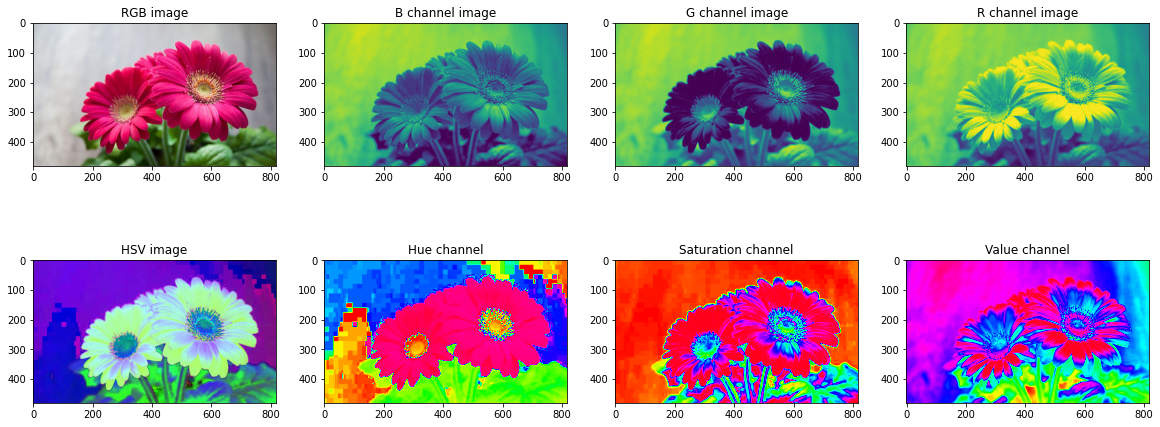

In [12]:
#Computer Vision version 2
import cv2

image = cv2.imread('images/flowers.png')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #convert RGB channel to HSV channel

h, s, v = cv2.split(hsv_image)    #Splitting the image into HSV channels individually
b, g, r = cv2.split(image)        #Splitting the image into BGR channels individually

fig = plt.figure(figsize=(20, 8))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("RGB image")

plt.subplot(2, 4, 2)
plt.imshow(b)
plt.title("B channel image")

plt.subplot(2,4,3)
plt.imshow(g)
plt.title('G channel image')

plt.subplot(2,4,4)
plt.imshow(r)
plt.title('R channel image')

plt.subplot(2, 4, 5)
plt.imshow(hsv_image, cmap = 'hsv')
plt.title("HSV image")

plt.subplot(2, 4, 6)
plt.imshow(h, cmap='hsv')
plt.title("Hue channel")

plt.subplot(2,4,7)
plt.imshow(s, cmap = 'hsv')
plt.title('Saturation channel')

plt.subplot(2,4,8)
plt.imshow(v, cmap = 'hsv')
plt.title('Value channel')

### 6. Image Denoising
Noise is typically defined as a random variation in brightness or colour information and it is frequently produced by technical limits of the image collection sensor or by improper environmental circumstances. 

Denoising an image is a difficult task since the noise is tied to the image’s high-frequency content, i.e. the details. As a result, the goal is to strike a balance between suppressing noise as much as possible while not losing too much information. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


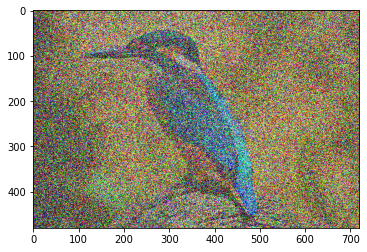

In [69]:
image = imread('images/bird.png')
plt.imshow(image + gauss)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Raw Gaussian Noise')

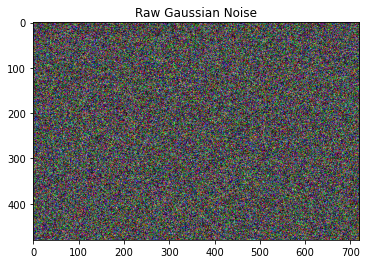

In [67]:
image = imread('images/bird.png')
row, columns, channels = image.shape[0], image.shape[1], image.shape[2]
mean, sigma = 0, 1
gauss = np.random.normal(mean, sigma, (row, columns, channels))
plt.imshow(gauss)
plt.title('Raw Gaussian Noise')

In [14]:
def add_noise(noise_typ, image):
    if noise_typ == 'gauss':
        row, col, ch = image.shape
        mean = 0
        var = 0.1
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, (row,col,ch)) #Gaussian (Normal) distribution
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy

    elif noise_typ == 'sp':
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.4
        out = np.copy(image)
        
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                for i in image.shape]
        out[coords] = 1

        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                for i in image.shape]
        out[coords] = 0
        return out

    elif noise_typ == 'poisson':
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals) #Poisson distribution
        return noisy

    elif noise_typ == 'speckle':
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

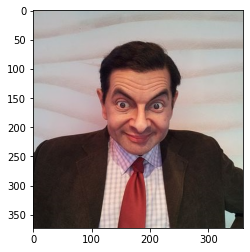

In [72]:
image = imread('images/bean.png')
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Speckle Noise')

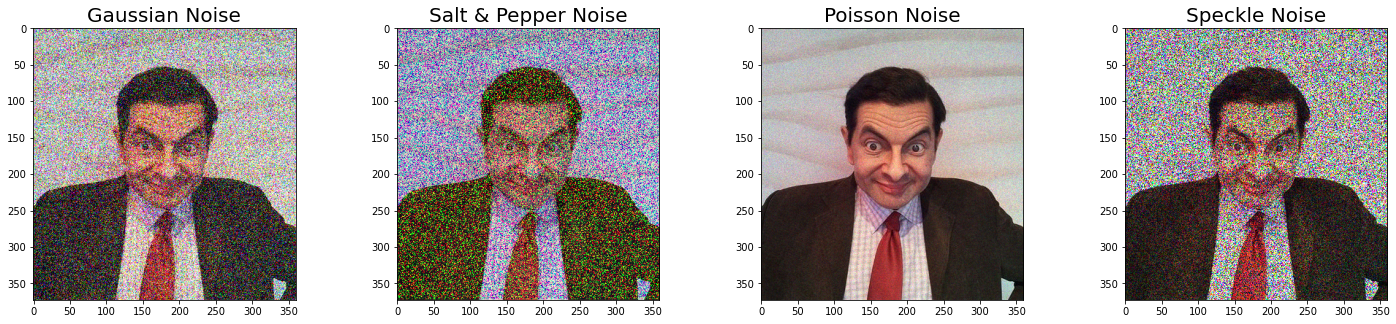

In [74]:
import warnings
warnings.filterwarnings('ignore')

image = imread('images/bean.png')
noise_type = ['gauss', 'sp', 'poisson', 'speckle']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (25, 5))
ax1.imshow(add_noise('gauss', image))
ax1.set_title('Gaussian Noise', size = 20)
ax2.imshow(add_noise('sp', image))
ax2.set_title('Salt & Pepper Noise', size = 20)
ax3.imshow(add_noise('poisson', image))
ax3.set_title('Poisson Noise', size = 20)
ax4.imshow(add_noise('speckle', image))
ax4.set_title('Speckle Noise', size = 20)

Text(0.5, 1.0, 'Median Filter')

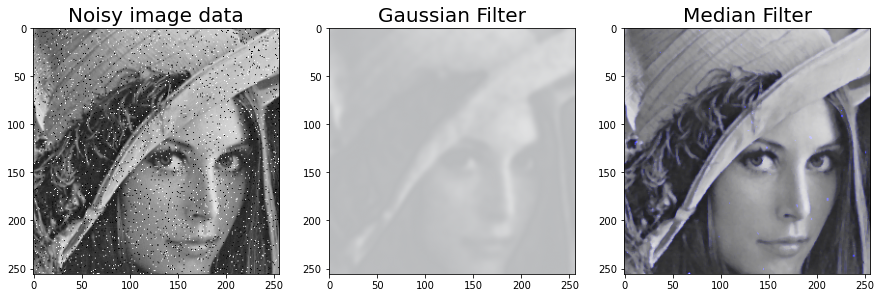

In [76]:
from scipy import ndimage as nd

def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = np.mgrid[-size:size+1, -size_y:size_y+1]
    g = np.exp(-(x ** 2 / float(size) + y ** 2 / float(size_y)))
    return g / g.sum()
 
image = imread('images/noisy.png')
gaussn_image = nd.gaussian_filter(image, sigma = 3)
median_image = nd.median_filter(image, size = 3)

# nd.gaussian_filter
# nd.median_filter

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15, 5))
ax1.imshow(image)
ax1.set_title('Noisy image data', size = 20)
ax2.imshow(gaussn_image)
ax2.set_title('Gaussian Filter', size = 20)
ax3.imshow(median_image)
ax3.set_title('Median Filter', size = 20)

### Theory test: From the images above, which type of noise is used as an input? Which filter is better? Gaussian or Median? Why do you think?

### Clustering for Image Segmentation

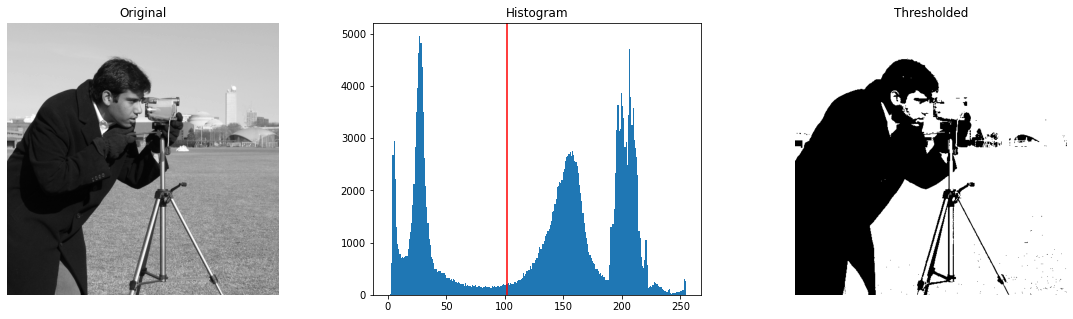

In [17]:
from skimage import data
from skimage.filters import threshold_otsu

image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

### KMeans

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.
We will soon dive into exactly *how* the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the *k*-means result.


K-mean is an unsupervised algorithm that aims to cluster the data based on distances.

In [79]:
from sklearn.cluster import KMeans
from matplotlib.image import imread

filename = 'images/humming.png'
image = imread(filename)
def segment_kmeans(filename, n_clusters = 4):
    image = imread(filename)
    X = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters).fit(X)
    segmented = kmeans.cluster_centers_[kmeans.labels_]
    segmented = segmented.reshape(image.shape)
    return segmented

SEGMENTED = []
clusters = np.arange(2, 10)
for cluster in clusters:
    SEGMENTED.append(segment_kmeans(filename, n_clusters = cluster))

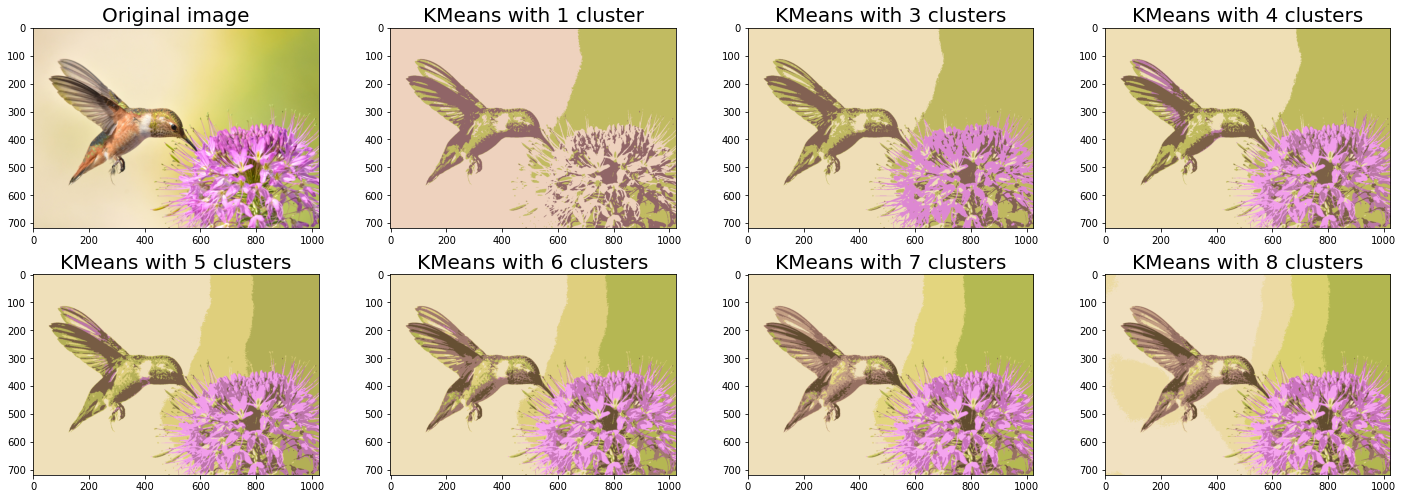

In [81]:
fig = plt.figure(figsize=(20, 7))
for i, idx in enumerate(range(0, 8)):
    if i == 0:
        plt.subplot(2, 4, i + 1)
        plt.imshow(image)
        plt.title('Original image', size = 20)
    else:
        plt.subplot(2, 4, i + 1)
        plt.imshow(SEGMENTED[idx])
        if idx == 1:
            plt.title(f'KMeans with {idx} cluster',  size = 20)
        else:
            plt.title(f'KMeans with {idx + 1} clusters', size = 20)
plt.tight_layout()

In [23]:
ssd = []
image = imread('images/humming.png')
X = image.reshape(-1, 3)

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

### How to know the optimal number of clusters?

Text(0.5, 1.0, 'Elbow curve')

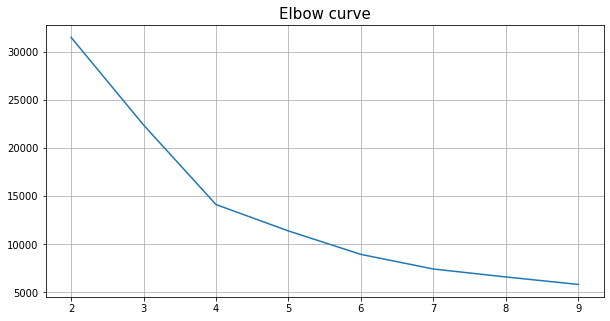

In [22]:
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), ssd)
plt.xticks(range(2, 10))
plt.grid(True)
plt.title('Elbow curve', size = 15)